# Modelos TFG 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [11]:
df_modelos = pd.read_csv("../data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia_1', case=False)]
categoricas = pd.read_csv("../data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [12]:
df_modelos.shape

(728, 226)

In [13]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [14]:
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]

df_modelos

,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,temp_corp_diferencia_2,pcr_diferencia_2,plaquetas_diferencia_2,leucocitos_diferencia_2,tad_diferencia_2,tas_diferencia_2,creatinina_diferencia_2,frec_resp_diferencia_2,eva_diferencia_2,frec_card_diferencia_2
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,0.1,130.40,-0.200669,-0.348689,-5.0,10.0,0.04,0.0,-1.0,-3.0
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,0.1,67.30,-0.125625,-0.281503,-7.0,-12.0,-0.12,2.0,-2.0,-3.0
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,-0.7,63.40,0.016129,0.205135,-1.0,-64.0,-0.03,0.0,1.0,-5.0
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,-0.4,41.88,0.164548,0.148814,10.0,-1.0,-0.04,6.0,0.0,12.0
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,-0.7,287.30,0.226708,0.106984,15.0,36.0,0.07,2.0,-3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,0.3,2.09,-0.005602,0.427745,0.0,11.0,0.19,4.0,0.0,26.0
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,-0.1,3.74,-0.147404,-0.687030,-4.0,-2.0,-0.08,2.0,2.0,0.0
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,0.0,2.64,-0.064538,-0.533416,1.0,18.0,-0.08,1.0,0.0,-10.0
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,0.4,214.00,-0.076633,-0.116448,9.0,2.0,-0.01,0.0,-1.0,6.0


In [15]:
for col in df_modelos.columns:
    print(col)

id_registro
sexo
edad
peso
talla
imc
neoadyuvancia
localizacion
tipo_histologico
ct
cn
cm
ecog
asa
dm
hta
cardiopatia
nefropatia
alcohol
fumador
neumopatia
enf_vasc_cer
enf_art_peri
demencia
esteroides
datos_basales_complete
vol_diuresis_dia
hemoglobina
perioperatorio_complete
acondicionamienio
tipo_cirugia
abordaje
perdida_sang
anastomosis
tipo_anastomosis
piloro
icg
intervencin_complete
fuga
proteinas_0
quick_0
linfocitos_0
sat_oxig_0
albumina_0
il6_0
neutrofilos_0
temp_corp_0
pcr_0
plaquetas_0
leucocitos_0
tad_0
tas_0
creatinina_0
frec_resp_0
eva_0
frec_card_0
proteinas_diferencia_0
quick_diferencia_0
linfocitos_diferencia_0
sat_oxig_diferencia_0
albumina_diferencia_0
il6_diferencia_0
neutrofilos_diferencia_0
temp_corp_diferencia_0
pcr_diferencia_0
plaquetas_diferencia_0
leucocitos_diferencia_0
tad_diferencia_0
tas_diferencia_0
creatinina_diferencia_0
frec_resp_diferencia_0
eva_diferencia_0
frec_card_diferencia_0
proteinas_1
quick_1
linfocitos_1
sat_oxig_1
albumina_1
il6_1
neutrofil

## HGBC

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [17]:
df_tmp = df_modelos.copy().drop('id_registro', axis=1, errors='ignore')
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]

# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# # Ajustar y transformar las columnas categóricas
# X_cat_encoded = encoder.fit_transform(df_tmp[categoricas])

# # Crear DataFrame con los nuevos nombres de columnas
# cat_encoded_df = pd.DataFrame(
#     X_cat_encoded,
#     columns=encoder.get_feature_names_out(categoricas),
#     index=df_tmp.index  # mantener los índices originales
# )

# # Concatenar con el resto de columnas no categóricas
# X_encoded = pd.concat([df_tmp.drop(columns=categoricas), cat_encoded_df], axis=1).drop(columns='fuga')
y = df_tmp['fuga']
X = df_tmp.drop(columns='fuga')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [18]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


param_grid = {
    'max_iter': [100],
    'learning_rate': [0.5, 0.8, 0.9, 1],
    'max_depth': [1, 2],
    'min_samples_leaf': [1, 2, 3, 4],
    'early_stopping': [True],
    'l2_regularization': [0.6, 0.7, 0.8, 1],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# Use RandomizedSearchCV for a more efficient search
grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=LeaveOneOut(),
                   estimator=HistGradientBoostingClassifier(random_state=14),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'early_stopping': [True],
                                        'l2_regularization': [0.6, 0.7, 0.8, 1],
                                        'learning_rate': [0.5, 0.8, 0.9, 1],
                                        'max_depth': [1, 2], 'max_iter': [100],
                                        'min_samples_leaf': [1, 2, 3, 4]})

In [19]:
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  0.9
max_depth:  1
min_samples_leaf:  1
early_stopping:  True
l2_regularization:  1
class_weight:  None
Mejor puntuación:
0.7890295358649789


In [ ]:
#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[335  47]
 [ 10  82]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       382
           1       0.64      0.89      0.74        92

    accuracy                           0.88       474
   macro avg       0.80      0.88      0.83       474
weighted avg       0.91      0.88      0.89       474

Accuracy: 0.879746835443038
AUC: 0.9500341452310495


Matriz de confusión con test
[[124  41]
 [ 19  20]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       165
           1       0.33      0.51      0.40        39

    accuracy                           0.71       204
   macro avg       0.60      0.63      0.60       204
weighted avg       0.76      0.71      0.73       204

Accuracy: 0.7058823529411765
AUC: 0.6752136752136751


In [21]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.7420814479638009
F1 score: 0.4


In [22]:
modelo_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=True,
                               l2_regularization=0.8, learning_rate=0.9,
                               max_depth=1, min_samples_leaf=1, random_state=14,
                               scoring='roc_auc')

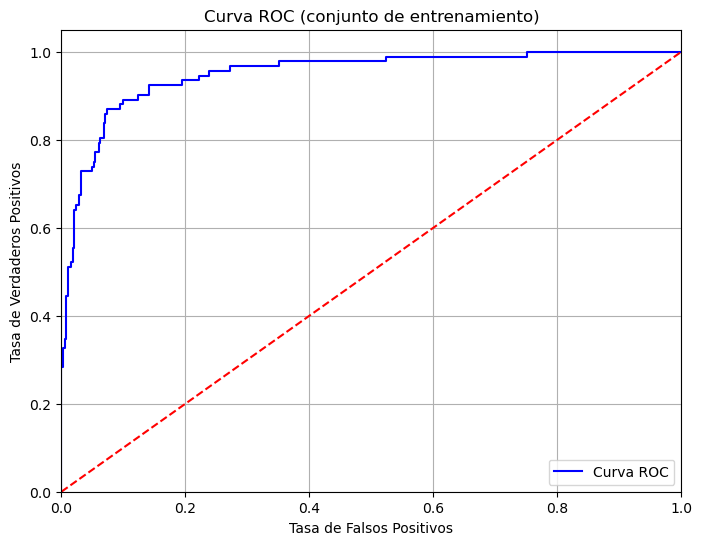

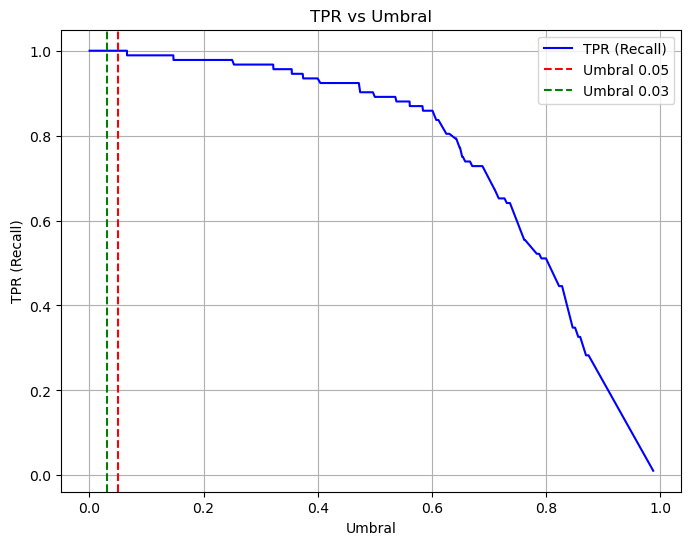

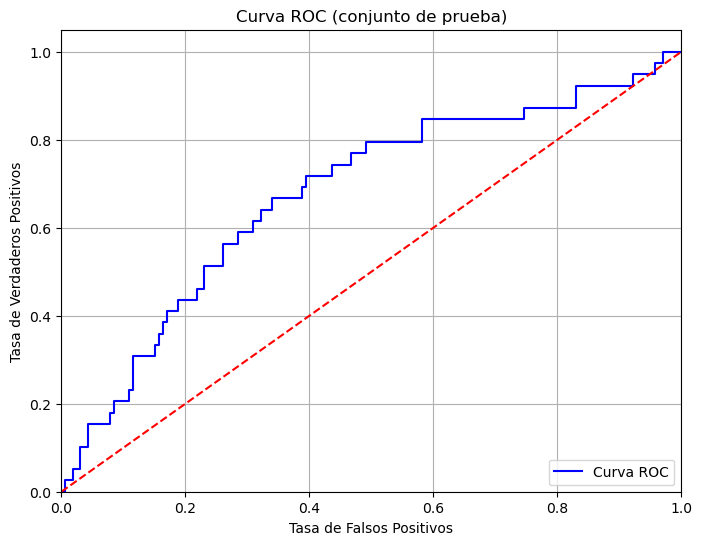

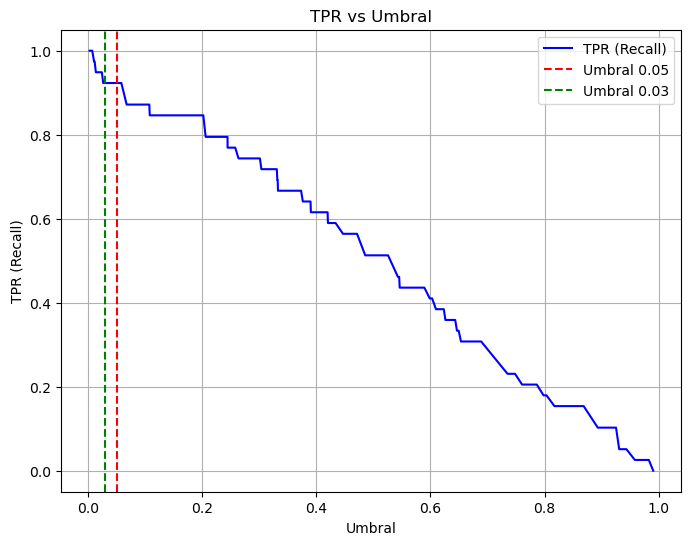

In [23]:

#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()




In [24]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=20)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-20:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 122 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x151e084c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000254, mean = 0.335, max = 0.991
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.991, mean = -0.141, max = 0.993
  -> model_info        : package sklearn

A new explainer has been created!


In [25]:
for im in imps:
    if im not in X.columns:
        imps.remove(im)

imps


['tad_diferencia_2',
 'eva_diferencia_0',
 'neutrofilos_diferencia_0',
 'tas_diferencia_2',
 'pcr_diferencia_2',
 'pcr_0',
 'temp_corp_1',
 'temp_corp_diferencia_2',
 'creatinina_0',
 'tas_diferencia_0',
 'perdida_sang',
 'tad_2',
 'il6_diferencia_2',
 'linfocitos_1',
 'il6_diferencia_0',
 'frec_card_1',
 'pcr_1',
 'neutrofilos_diferencia_2',
 'localizacion']

In [39]:
df_tmp = df_modelos[df_modelos.fuga != -1]
y = df_tmp.fuga
df_tmp = df_tmp[imps]
X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, stratify=y, random_state=14)

In [40]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[338  44]
 [  8  84]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       382
           1       0.66      0.91      0.76        92

    accuracy                           0.89       474
   macro avg       0.82      0.90      0.85       474
weighted avg       0.91      0.89      0.90       474

Accuracy: 0.890295358649789
AUC: 0.9499203277942181


Matriz de confusión con test
[[127  38]
 [ 17  22]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       165
           1       0.37      0.56      0.44        39

    accuracy                           0.73       204
   macro avg       0.62      0.67      0.63       204
weighted avg       0.78      0.73      0.75       204

Accuracy: 0.7303921568627451
AUC: 0.6930846930846931


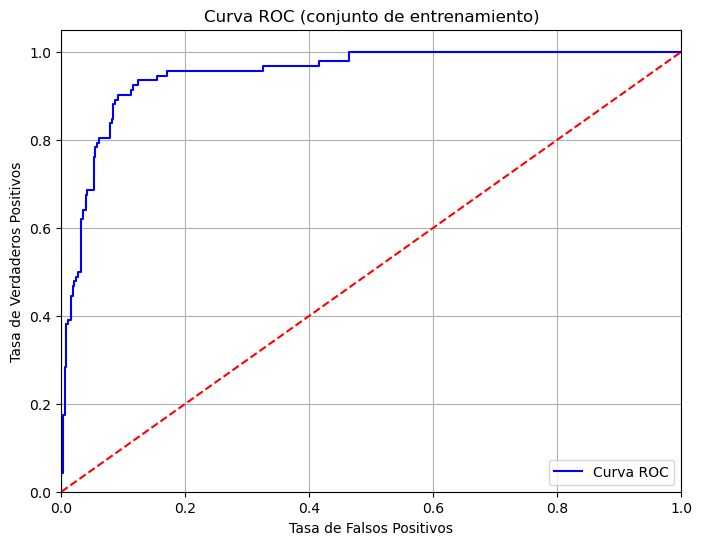

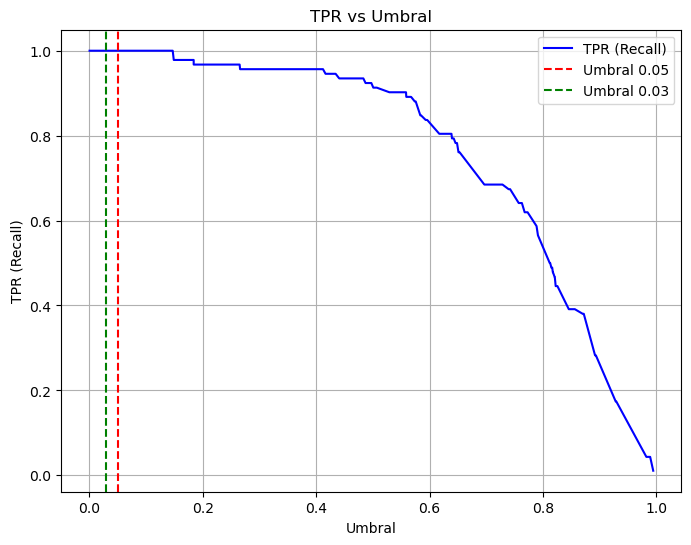

In [41]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



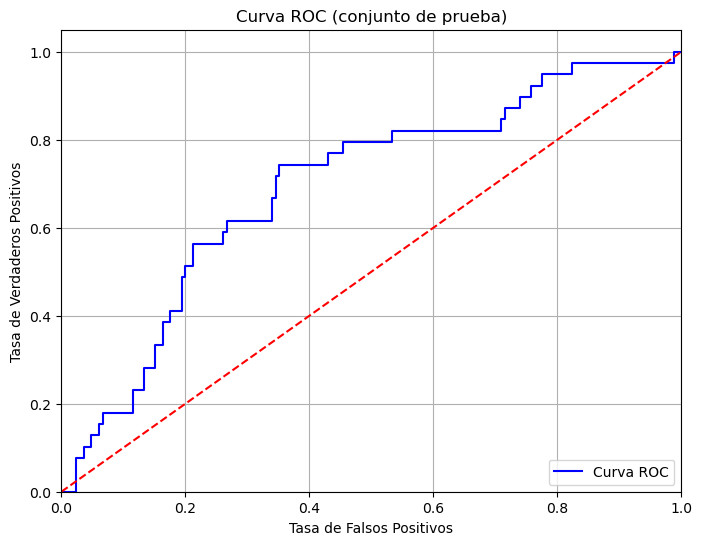

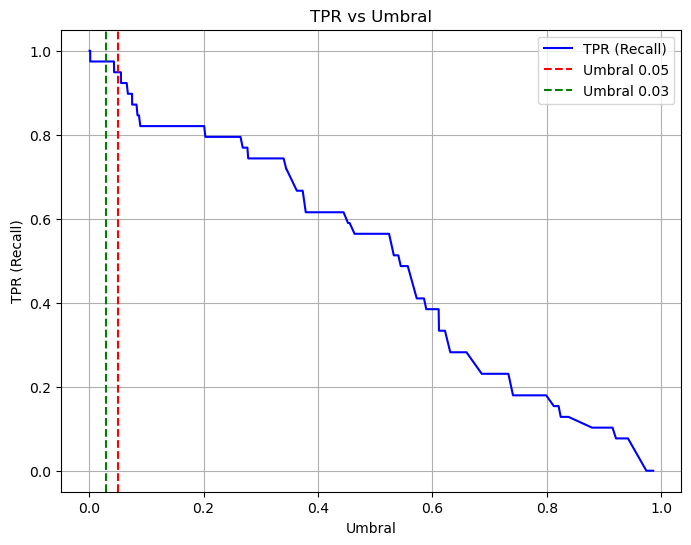

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



Umbral óptimo ROC: 0.3399
Umbral óptimo según F1-score: 0.5568


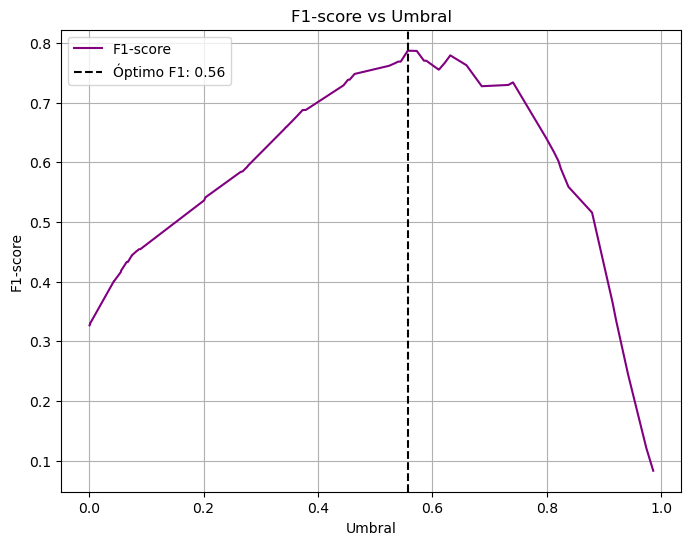

In [43]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


In [44]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[170, 212],
       [  0,  92]])

In [45]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[107,  58],
       [ 11,  28]])